In [1]:
import matplotlib.pyplot as plt
from wrinkleology import simple_disk
import scipy.constants as sc
import numpy as np

In [2]:
def tau(r, tau_10=100.0, tau_q=-1.0, tau_taper=100.0, tau_exponent=1.0):
    return tau_10 * (r / 10.0)**tau_q * np.exp(-(r / tau_taper)**tau_exponent)

def dV(r, dV_10=1500.0, dV_q=-0.25):
    return dV_10 * (r / 10.0)**dV_q

def vtheta(r, mstar=1.0):
    return np.sqrt(sc.G * mstar * 1.9887e30 / r / sc.au)

def Tb(r, Tb_10=30.0, Tb_q=-1.0):
    return Tb_10 * (r / 10.0)**Tb_q

In [3]:
disk = simple_disk()

In [4]:
disk.set_sky_coords(FOV=20.0, npix=512)

In [5]:
disk.set_disk_coords(x0=0.0, y0=0.0, inc=45.0, PA=45.0, dist=140.0, side='both')

In [6]:
disk.set_Tb_profile(function=Tb, max=10.0)
disk.set_dV_profile(function=dV)
disk.set_vtheta_profile(function=vtheta)
disk.set_tau_profile(function=tau)

In [7]:
velax = np.arange(-3e3, 3e3+1, 250)
cube = disk.get_cube(velax, vlsr=1e3)

In [14]:
%prun cube = disk.get_cube(velax, vlsr=1e3)

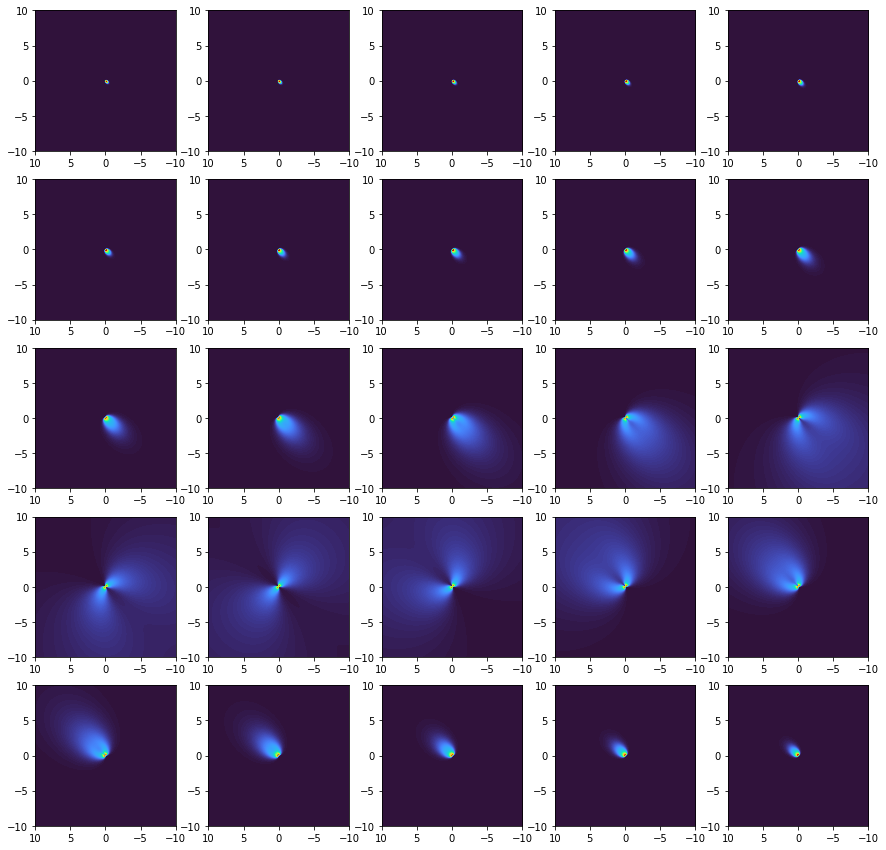

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for chan, ax in zip(cube, axs.flatten()):
    ax.imshow(chan, origin='lower', extent=disk.extent, cmap='turbo')
    ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])

In [9]:
def z_front(r, zr=0.5):
    return zr * r

def z_back(r):
    return -z_front(r)

In [10]:
disk = simple_disk()
disk.set_sky_coords(FOV=10.0, npix=128)
disk.set_disk_coords(x0=0.0, y0=0.0, inc=25.0, PA=45.0, dist=140.0, z_func=z_front, side='front')
disk.set_disk_coords(x0=0.0, y0=0.0, inc=25.0, PA=45.0, dist=140.0, z_func=z_back, side='back')
disk.set_Tb_profile(function=Tb)
disk.set_dV_profile(function=dV)
disk.set_vtheta_profile(function=vtheta)
disk.set_tau_profile(function=tau)

In [11]:
velax = np.arange(-3e3, 3e3+1, 250)
cube = disk.get_cube(velax)

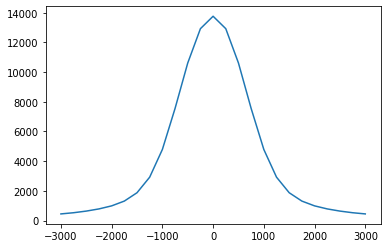

In [13]:
fig, ax = plt.subplots()

ax.plot(velax, [np.sum(c) for c in cube])

In [2]:
from wrinkleology import parametric_disk

In [8]:
velax = np.arange(-3e3, 3e3+1, 250)

cube = parametric_disk(x0=0.0, y0=0.0, inc=40.0, PA=70.0,
                       z_10=5.0, z_q=1.5, z_tap=np.inf, z_exp=1.0,
                       Tb_10=30.0, Tb_q=-1.0, Tb_tap=np.inf, Tb_exp=1.0,
                       dV_10=1000.0, dV_q=-0.5, dV_tap=np.inf, dV_exp=1.0,
                       tau_10=1e2, tau_q=-1.0, tau_tap=np.inf, tau_exp=1.0,
                       mstar=1.0, dist=140.0, velax=velax, vlsr=0.0, 
                       FOV=5.0, npix=64)

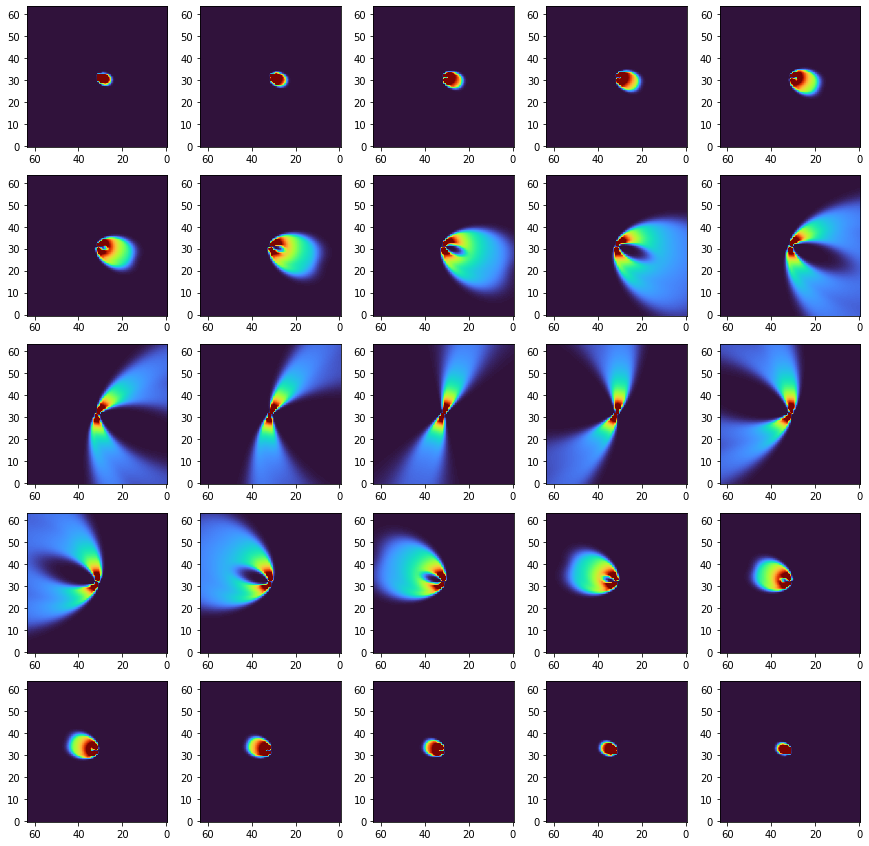

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
for chan, ax in zip(cube, axs.flatten()):
    ax.imshow(chan, origin='lower', vmin=0.0, vmax=5.0, cmap='turbo')
    ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])

In [29]:
%prun cube = parametric_disk(x0=0.0,\
                             y0=0.0,\
                             inc=40.0,\
                             PA=70.0,\
                             z_10=5.0,\
                             psi=1.5,\
                             z_taper=np.inf,\
                       z_exponent=1.0,\
                       Tb_10=30.0,\
                       Tb_q=-1.0,\
                       dV_10=1000.0,\
                       dV_q=-0.5,\
                       tau_10=1e3,\
                       tau_q=-1.0,\
                       mstar=1.0,\
                       velax=velax,\
                       vlsr=0.0,\
                       dist=140.0,\
                       FOV=5.0,\
                       npix=128)